In [ ]:
!pip install requests
!pip install html5lib
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import collections
import requests
import bs4
from bs4 import BeautifulSoup
import os
import pickle
from ast import literal_eval

In [ ]:
!pip install parse-ingredients

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Q1 A)**

In [ ]:
import requests
from bs4 import BeautifulSoup
from parse_ingredients import parse_ingredient
#import parse_ingredient
import json
import csv

URL = "https://www.allrecipes.com/recipes-a-z-6735880"
r = requests.get(URL).text
count = 0;
with open('Recipe.csv', 'w', newline='') as file:
   writer = csv.writer(file)
   writer.writerow(["Recipe_name", "Recipe_URL", "Ingredients", "Instructions_for_cooking"])
   soup = BeautifulSoup(r, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib
   articles = soup.find("div", {"class": "comp alphabetical-list mntl-block"})
   a_tags = articles.find_all('a', href=True)
   for tag in a_tags:
     if(count == 10000):
          break

      print(tag['href'])
      r1 = requests.get(tag['href']).text
      soup1 = BeautifulSoup(r1, 'html5lib')
      cont = soup1.find("div", {"class": "comp mntl-taxonomysc-article-list-group mntl-block"})
      anew_tags  = cont.find_all('a', href=True)

      for tags in anew_tags:
        if(count == 10000):
          break
        count = count  + 1
        r2 = requests.get(tags['href']).text
        soup2 = BeautifulSoup(r2, 'html5lib')
        ingre = soup2.find("ul", {"class": "mntl-structured-ingredients__list"})
        new_ingre = soup2.find_all("li",{"mntl-structured-ingredients__list-item "})
        name_holder = soup2.find("div",{"class":"loc article-header"})
        name = name_holder.find('h1').text.strip()
        points = soup2.find_all("li",{"class": "comp mntl-sc-block-group--LI mntl-sc-block mntl-sc-block-startgroup"})
        #print(points)
        #points = method.find_all("li")
        detail = ""
        flag = 0
        for i in points:
          text = i.p.text
          #print(text)
          if flag==0:
            detail = text + "\n"
            flag = 1
          else :
            detail = detail + text

        ing = ""
        for i in new_ingre:
          ok = i.p.text.split(',')

          print(ok)
          ing = ing + ok[0] + ", "

        writer.writerow([name, tags['href'] , ing,detail])

https://www.allrecipes.com/recipes/76/appetizers-and-snacks/
['2 (10 ounce) cans chunk chicken', ' drained']
["¾ cup hot pepper sauce (such as Frank's RedHot®)"]
['2 (8 ounce) packages cream cheese', ' softened']
['1 cup ranch dressing']
['1 ½ cups shredded Cheddar cheese']
['1 bunch celery', ' cut into 4-inch pieces']
['1 (8 ounce) box chicken-flavored crackers']
['¾ cup melted butter']
['1 ½ tablespoons Dijon mustard']
['1 ½ teaspoons Worcestershire sauce']
['1 ½ tablespoons poppy seeds']
['1 tablespoon dried minced onion']
['24  mini sandwich rolls']
['1 pound thinly sliced cooked deli ham']
['1 pound thinly sliced Swiss cheese']
['1 ½ cups raw whole pumpkin seeds']
['2 teaspoons butter', ' melted']
['1 pinch salt']
['1 loaf French bread', ' cut into 1/4-inch slices']
['1 tablespoon extra-virgin olive oil']
['8  roma (plum) tomatoes', ' diced']
['⅓ cup chopped fresh basil']
['1 ounce Parmesan cheese', ' freshly grated']
['2 cloves garlic', ' minced']
['1 tablespoon good quality bals

KeyboardInterrupt: ignored

In [ ]:
from pandas import *
from parse_ingredients import parse_ingredient

# reading CSV file
data = read_csv("Recipe.csv")
id = []
count = 0
for i in data.Ingredients:
  count = count + 1
  val = "recipe_"+str(count)
  id.append(val)

data.insert(loc = 0,
          column = 'RecipeID',
          value = id)

data1 = pd.DataFrame(data)

data1


#month = data['Ingrident'].tolist()

,RecipeID,Recipe_name,Recipe_URL,Ingredients,Instructions_for_cooking
0,recipe_1,Buffalo Chicken Dip,https://www.allrecipes.com/recipe/68461/buffal...,"2 (10 ounce) cans chunk chicken, ¾ cup hot pep...",\nHeat chicken and hot pepper sauce in a skill...
1,recipe_2,Baked Ham and Cheese Sliders,https://www.allrecipes.com/recipe/216756/baked...,"¾ cup melted butter, 1 ½ tablespoons Dijon mus...",\nPreheat oven to 350 degrees F (175 degrees C...
2,recipe_3,Roasted Pumpkin Seeds,https://www.allrecipes.com/recipe/13768/roaste...,"1 ½ cups raw whole pumpkin seeds, 2 teaspoons ...",\nPreheat oven to 300 degrees F (150 degrees C...
3,recipe_4,Balsamic Bruschetta,https://www.allrecipes.com/recipe/54165/balsam...,"1 loaf French bread, 1 tablespoon extra-virgin...",\nPreheat oven to 400 degrees F (200 degrees C...
4,recipe_5,Guacamole,https://www.allrecipes.com/recipe/14231/guacam...,"3 avocados - peeled, 1 lime, 1 teaspoon salt...","\nMash avocados, lime juice, and salt together..."
...,...,...,...,...,...
432,recipe_433,Bialys vs. Bagels: What's the Difference?,https://www.allrecipes.com/article/bialys-vs-b...,NaN,NaN
433,recipe_434,Pumpernickel Bagels,https://www.allrecipes.com/recipe/223557/pumpe...,"1 ¼ cups warm water, 1 cup whole-wheat flour, ...","\nCombine warm water, whole-wheat flour, and y..."
434,recipe_435,Moist Passover Bagel,https://www.allrecipes.com/recipe/140020/moist...,"cooking spray, 1 ⅓ cups water, ⅔ cup peanut ...",\nPreheat oven to 375 degrees F (190 degrees C...
435,recipe_436,Multigrain Bagels,https://www.allrecipes.com/recipe/231089/multi...,"½ cup warm water (105 degrees F/41 degrees C),...","\nCombine warm water, yeast, and sugar in a bo..."


In [ ]:
from pandas import *
from parse_ingredients import parse_ingredient
import math

data.drop(['Recipe_name', 'Recipe_URL', 'Instructions_for_cooking'],axis=1, inplace=True)
print(data)
df2=data.dropna().reset_index(drop=True)
print(data.head())
ingredents_l = []
count = 0
for i in df2.Ingredients:

    stro = i.split(",")
    count = count + 1
    val = "recipe_"+str(count)
    for i in stro:
      char = i[0]
      res = i.replace(char, "1", 1)
      if res != '1':
        result = parse_ingredient(res).name   #NER
        ingredents_l.append((val,result))
    #print(result)

df = pd.DataFrame(ingredents_l,columns=('RecipeID','Ingredient'))
df.to_csv('Q1B.csv')
df
#month = data['Ingrident'].tolist()

       RecipeID                                        Ingredients
0      recipe_1  2 (10 ounce) cans chunk chicken, ¾ cup hot pep...
1      recipe_2  ¾ cup melted butter, 1 ½ tablespoons Dijon mus...
2      recipe_3  1 ½ cups raw whole pumpkin seeds, 2 teaspoons ...
3      recipe_4  1 loaf French bread, 1 tablespoon extra-virgin...
4      recipe_5  3  avocados - peeled, 1  lime, 1 teaspoon salt...
..          ...                                                ...
432  recipe_433                                                NaN
433  recipe_434  1 ¼ cups warm water, 1 cup whole-wheat flour, ...
434  recipe_435    cooking spray, 1 ⅓ cups water, ⅔ cup peanut ...
435  recipe_436  ½ cup warm water (105 degrees F/41 degrees C),...
436  recipe_437    cooking spray, 1 cup all-purpose flour, 2 te...

[437 rows x 2 columns]
   RecipeID                                        Ingredients
0  recipe_1  2 (10 ounce) cans chunk chicken, ¾ cup hot pep...
1  recipe_2  ¾ cup melted butter, 1 ½ tablespo

,RecipeID,Ingredient
0,recipe_1,cans chunk chicken
1,recipe_1,¾ cup hot pepper sauce
2,recipe_1,packages cream cheese
3,recipe_1,ranch dressing
4,recipe_1,½ cups shredded Cheddar cheese
...,...,...
3406,recipe_426,½ teaspoon salt
3407,recipe_426,fat-free Greek yogurt
3408,recipe_426,¼ cup garlic and herb cheese spread
3409,recipe_426,large egg white


In [ ]:
import random
randomlist = []
for i in range(0,3):
  n = random.randint(1,8)
  new_id = "recipe_"+str(n)
  randomlist.append(new_id)
print(randomlist)

['recipe_3', 'recipe_5', 'recipe_1']


In [ ]:
for j in range(0,len(randomlist)):
  for i in data1.RecipeID:
    if randomlist[j] == i:
      df2=data1.loc[df['RecipeID'] == randomlist[i], 'Ingredients']
      stro = i.split(",")
       count = count + 1
    df2=df1.loc[df['RecipeID'] == randomlist[i], 'Courses']
    val = "recipe_"+str(count)
    for i in stro:
      char = i[0]
      res = i.replace(char, "1", 1)
      if res != '1':
        result = parse_ingredient(res).name
        ingredents_l.append((val,result))


NameError: ignored

In [ ]:
from pandas import *

# reading CSV file
data = read_csv("Q1B.csv")
ing_list = data['Ingredient'].tolist()


# converting column data to list

In [ ]:
print(ing_list)

['cans chunk chicken', '¾ cup hot pepper sauce', 'packages cream cheese', 'ranch dressing', '½ cups shredded Cheddar cheese', 'celery', 'box chicken-flavored crackers', 'melted butter', '½ tablespoons Dijon mustard', '½ teaspoons Worcestershire sauce', '½ tablespoons poppy seeds', 'dried minced onion', 'mini sandwich rolls', 'thinly sliced cooked deli ham', 'thinly sliced Swiss cheese', '½ cups raw whole pumpkin seeds', 'butter', 'salt', 'loaf French bread', 'extra-virgin olive oil', 'roma  tomatoes', '⅓ cup chopped fresh basil', 'Parmesan cheese', 'garlic', 'good quality balsamic vinegar', 'extra-virgin olive oil', '¼ teaspoon kosher salt', '¼ teaspoon freshly ground black pepper', 'avocados - peeled', 'lime', 'salt', 'roma  tomatoes', '½ cup diced onion', 'chopped fresh cilantro', 'minced garlic', 'ground cayenne pepper', 'kale', 'olive oil', 'flaked sea salt', 'cream cheese', '½ cup shredded sharp Cheddar cheese', 'jalapeno peppers', 'slices bacon', 'mayonnaise', 'garlic', '½ tables

In [ ]:
from collections import Counter
list1=ing_list
counts = Counter(list1)
print(len(counts))
print(counts)

1415
Counter({'all-purpose flour': 75, 'white sugar': 63, 'garlic': 62, 'salt': 56, 'butter': 50, 'ground cinnamon': 50, '½ teaspoon salt': 41, 'olive oil': 40, '¼ teaspoon salt': 37, 'salt and ground black pepper to taste': 35, 'eggs': 34, 'cooking spray': 30, 'egg': 29, 'water': 28, 'vanilla extract': 27, 'vegetable oil': 26, 'milk': 25, 'can artichoke hearts': 24, 'large eggs': 22, 'lemon juice': 22, 'brown sugar': 22, 'apples - peeled': 21, 'garlic powder': 20, 'grated Parmesan cheese': 20, '½ cup white sugar': 20, 'baking powder': 20, '¼ cup white sugar': 19, '½ teaspoon ground cinnamon': 17, '½ teaspoon ground black pepper': 16, 'mayonnaise': 15, 'package cream cheese': 15, 'ground black pepper': 14, 'unsalted butter': 14, 'large egg': 13, '¼ cup water': 12, '½ cup milk': 12, '½ teaspoon garlic powder': 12, 'panko bread crumbs': 12, 'package frozen chopped spinach': 12, 'extra-virgin olive oil': 11, 'salt and pepper to taste': 11, '¼ cup butter': 11, '¼ teaspoon ground black pepp

In [ ]:

freq = []
for i in counts:
  freq.append((i,counts[i]))


freq_df = pd.DataFrame(freq,columns=('Ingredient','Freq'))
freq_df

,Ingredient,Freq
0,cans chunk chicken,1
1,¾ cup hot pepper sauce,1
2,packages cream cheese,9
3,ranch dressing,2
4,½ cups shredded Cheddar cheese,4
...,...,...
1410,quarts water,1
1411,cool water,1
1412,fat-free Greek yogurt,1
1413,¼ cup garlic and herb cheese spread,1


In [ ]:
with open('frequ.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Ingrident","count"])
    for i in counts:

      print(i , counts[i])
      writer.writerow([i, counts[i]])

cans chunk chicken 1
¾ cup hot pepper sauce 1
packages cream cheese 9
ranch dressing 2
½ cups shredded Cheddar cheese 4
celery 1
box chicken-flavored crackers 1
melted butter 5
½ tablespoons Dijon mustard 2
½ teaspoons Worcestershire sauce 2
½ tablespoons poppy seeds 2
dried minced onion 2
mini sandwich rolls 2
thinly sliced cooked deli ham 2
thinly sliced Swiss cheese 2
½ cups raw whole pumpkin seeds 1
butter 50
salt 56
loaf French bread 2
extra-virgin olive oil 11
roma  tomatoes 4
⅓ cup chopped fresh basil 1
Parmesan cheese 1
garlic 62
good quality balsamic vinegar 1
¼ teaspoon kosher salt 1
¼ teaspoon freshly ground black pepper 1
avocados - peeled 2
lime 3
½ cup diced onion 2
chopped fresh cilantro 6
minced garlic 8
ground cayenne pepper 3
kale 1
olive oil 40
flaked sea salt 1
cream cheese 8
½ cup shredded sharp Cheddar cheese 2
jalapeno peppers 1
slices bacon 6
mayonnaise 15
½ tablespoons lemon juice 3
¾ teaspoon salt 5
½ teaspoon ground black pepper 16
rice vermicelli 1
rice wrap

In [ ]:
data = read_csv("Q1B.csv")
month = data['RecipeID'].tolist()
from collections import Counter
list1=month
counts = Counter(list1)
print(counts)
recipe_size = []
for i in counts:
  recipe_size.append(counts[i])

Counter({'recipe_185': 21, 'recipe_199': 20, 'recipe_208': 20, 'recipe_400': 20, 'recipe_263': 19, 'recipe_425': 18, 'recipe_148': 17, 'recipe_243': 17, 'recipe_411': 17, 'recipe_48': 16, 'recipe_151': 16, 'recipe_218': 16, 'recipe_242': 16, 'recipe_266': 16, 'recipe_401': 16, 'recipe_9': 15, 'recipe_193': 15, 'recipe_203': 15, 'recipe_224': 15, 'recipe_249': 15, 'recipe_260': 15, 'recipe_398': 15, 'recipe_19': 14, 'recipe_58': 14, 'recipe_271': 14, 'recipe_344': 14, 'recipe_377': 14, 'recipe_402': 14, 'recipe_17': 13, 'recipe_86': 13, 'recipe_87': 13, 'recipe_113': 13, 'recipe_146': 13, 'recipe_149': 13, 'recipe_150': 13, 'recipe_156': 13, 'recipe_186': 13, 'recipe_188': 13, 'recipe_217': 13, 'recipe_236': 13, 'recipe_252': 13, 'recipe_275': 13, 'recipe_280': 13, 'recipe_319': 13, 'recipe_352': 13, 'recipe_359': 13, 'recipe_376': 13, 'recipe_416': 13, 'recipe_33': 12, 'recipe_99': 12, 'recipe_104': 12, 'recipe_106': 12, 'recipe_110': 12, 'recipe_152': 12, 'recipe_159': 12, 'recipe_184

In [ ]:
from statistics import mean
round(mean(recipe_size))  #mean size of recipe

8

In [ ]:
counts_new = Counter(recipe_size)
print(counts_new)

Counter({7: 60, 6: 55, 8: 49, 5: 39, 9: 37, 10: 29, 11: 28, 4: 26, 3: 20, 13: 20, 12: 20, 2: 10, 15: 7, 14: 6, 16: 6, 1: 5, 17: 3, 20: 3, 21: 1, 19: 1, 18: 1})


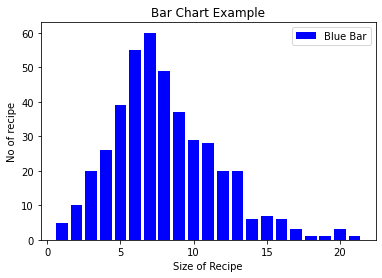

In [ ]:
import matplotlib.pyplot as plt

x = []
y = []
for i in counts_new:
  x.append(i)
  y.append(counts_new[i])


plt.bar(x, y, label="Blue Bar", color='b')
plt.plot()
plt.savefig("Recipe Size Distribution.png")
plt.savefig("Recipe Size Distribution.svg")
plt.xlabel("Size of Recipe")
plt.ylabel("No of recipe")
plt.title("Bar Chart Example")
plt.legend()

In [ ]:
cummlative_freq=[]
for i in counts_new:
  cummlative_freq.append((i, counts_new[i]))

df_cummlative = pd.DataFrame(cummlative_freq, columns=('RecipeSize','Freq'))
df_cummlative



,RecipeSize,Freq
0,7,60
1,8,49
2,3,20
3,10,29
4,4,26
5,5,39
6,15,7
7,9,37
8,6,55
9,13,20


In [ ]:
df_cummlative['CumulativeFrequency']=[ (sum(df_cummlative["Freq"])-sum(df_cummlative["Freq"][:index+1]))/sum(df_cummlative["Freq"]) for index in range(df_cummlative.shape[0]) ]
df_cummlative

,RecipeSize,Freq,CumulativeFrequency
0,7,60,0.859155
1,8,49,0.744131
2,3,20,0.697183
3,10,29,0.629108
4,4,26,0.568075
5,5,39,0.476526
6,15,7,0.460094
7,9,37,0.373239
8,6,55,0.244131
9,13,20,0.197183


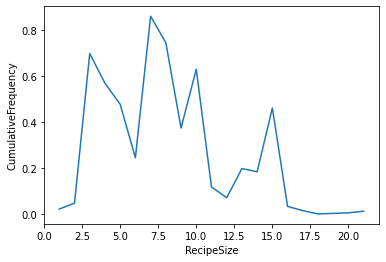

In [ ]:
cum_recipe_size_dist_fig = sns.lineplot(data=df_cummlative, x="RecipeSize", y="CumulativeFrequency", markers=True)

In [ ]:
cum_recipe_size_dist_fig.get_figure().savefig('Cumulative Recipe Size Distribution.png')
cum_recipe_size_dist_fig.get_figure().savefig('Cumulative Recipe Size Distribution.svg')

In [ ]:
print(data)

      Unnamed: 0    RecipeID                           Ingredient
0              0    recipe_1                   cans chunk chicken
1              1    recipe_1               ¾ cup hot pepper sauce
2              2    recipe_1                packages cream cheese
3              3    recipe_1                       ranch dressing
4              4    recipe_1       ½ cups shredded Cheddar cheese
...          ...         ...                                  ...
3406        3406  recipe_426                      ½ teaspoon salt
3407        3407  recipe_426                fat-free Greek yogurt
3408        3408  recipe_426  ¼ cup garlic and herb cheese spread
3409        3409  recipe_426                      large egg white
3410        3410  recipe_426           everything bagel seasoning

[3411 rows x 3 columns]


In [ ]:
q3_df=data1.copy()

In [ ]:
frequency_rank_df = df_cummlative.drop("CumulativeFrequency",axis=1).loc[1:].sort_values("Freq",ascending=False)
frequency_rank_df['Rank'] = list(range(1,frequency_rank_df.shape[0]+1))
frequency_rank_df['Normalized Frquency'] = [ freq/int(frequency_rank_df['Freq'].head(1)) for freq in frequency_rank_df['Freq'] ]
frequency_rank_df

,RecipeSize,Freq,Rank,Normalized Frquency
8,6,55,1,1.000000
1,8,49,2,0.890909
5,5,39,3,0.709091
7,9,37,4,0.672727
3,10,29,5,0.527273
11,11,28,6,0.509091
4,4,26,7,0.472727
9,13,20,8,0.363636
2,3,20,9,0.363636
12,12,20,10,0.363636


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


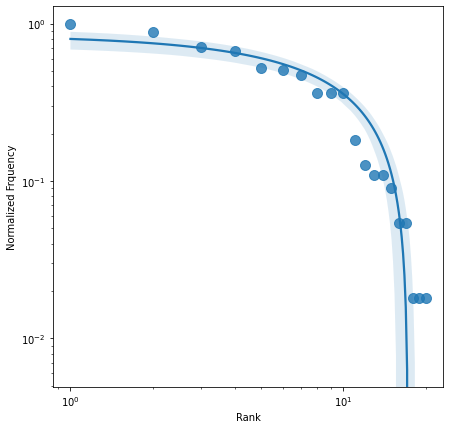

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
frequency_rank_graph = sns.regplot("Rank", "Normalized Frquency", frequency_rank_df, ax=ax, scatter_kws={"s": 100})

Copy Mutate Algorithm has 5 Parameters:

Number of Epochs = 5

Number of Ingredients Per Recipe = 10

Number of Ingredients in each Recipe to be Mutated = 1

Initial Number of Recipes = 500

The Ratio between Sizes of, Pool of Ingredients and Pool of Recipes = 1:10

In [ ]:
#Get list of Ingredients
from pandas import *
ingredients = []
data = read_csv("frequ.csv")
print(data)
for ingredient_list in data.Ingrident:
    ingredients.append(ingredient_list)

# TC: O(samples in dataset)

                                Ingrident  count
0                      cans chunk chicken      1
1                  ¾ cup hot pepper sauce      1
2                   packages cream cheese      9
3                          ranch dressing      2
4          ½ cups shredded Cheddar cheese      4
...                                   ...    ...
1410                         quarts water      1
1411                           cool water      1
1412                fat-free Greek yogurt      1
1413  ¼ cup garlic and herb cheese spread      1
1414           everything bagel seasoning      1

[1415 rows x 2 columns]


In [ ]:
import pandas as pd
from random import random
from random import sample
from random import randrange
ingredients_list = []
for ing in ingredients:
    ingredients_list.append([ing])
ingredients_df = pd.DataFrame(ingredients_list)
ingredients_df.columns =['Ingredient']
ingredients_df

,Ingredient
0,cans chunk chicken
1,¾ cup hot pepper sauce
2,packages cream cheese
3,ranch dressing
4,½ cups shredded Cheddar cheese
...,...
1410,quarts water
1411,cool water
1412,fat-free Greek yogurt
1413,¼ cup garlic and herb cheese spread


In [ ]:
nature_basket = ingredients
kitchen_basket = []
recipes = []
recipe_size = 10   #Recipe Size
number_epochs = 10 # Number of Epochs

In [ ]:
import pandas as pd
from random import random
from random import sample
from random import randrange
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from collections import Counter

In [ ]:
initial_number_ingredients = 500
#Generate and store list of indices of ingredients to be taken initially in kitchen basket
indices_kitchen_basket_initial = sample(list(range(len(ingredients))),initial_number_ingredients)
kitchen_basket = ingredients_df.iloc[indices_kitchen_basket_initial]
# remove from nature basket, those ingredients that are taken into kitchen basket
nature_basket = set(nature_basket) - set(kitchen_basket['Ingredient'])
print("Initial Kitchen Basket:")
kitchen_basket

Initial Kitchen Basket:


,Ingredient
566,beef broth
92,lean ground beef
697,⅓ cups fresh cranberries
515,½ cup butter
1320,glutinous sweet rice
...,...
601,½ pounds pork rib tips
56,finely chopped peanuts
1352,¾ cup unsalted butter
442,shredded cooked chicken


In [ ]:
#Initialize Recipes
'''
Generate a random set of 10 indices from kitchen basket ingredients,
if that set is not exisiting in the set of recipes,
add that set to set of recipes, else regenerate the set of ingredients,
repeat the process untill have sufficient number of recipes
'''
count_recipes_kb = 0 # The number of recipes generated

def check_recipe_unique(new_recipe,set_recipes):
    '''
    Takes two arguments:
        1) The new recipe i.e., list of indices of ingredients
        2) The set of such recipes that are already existing
    Returns whether argument 1 is unique, i.e., not a member of argument 2 (True/False)
    '''
    # TC: O(primordial cuisine size)
    new_rep = new_recipe.copy()
    new_rep.sort()
    new_rep = ''.join([str(x) for x in new_rep]) #Convert into a string
    for exist_rep in set_recipes:
        exist_recipe = exist_rep.copy()
        exist_recipe.sort()
        exist_recipe = ''.join([str(x) for x in exist_recipe]) #Convert into a string
        if exist_recipe == new_rep:
            print("Duplicate New Recipe Generated, Retry!")
            return False
    return True #If no duplicates found

recipes_indices = []
while(count_recipes_kb<500):
    recipe_indices = sample(list(kitchen_basket.index),recipe_size)
    if check_recipe_unique(recipe_indices,recipes_indices):
        # if new recipe is unique, add it to solution
        recipes_indices.append(recipe_indices)
        count_recipes_kb+=1 # increase the count of added recipes

# Put Ingredient Names in recipes
recipe = []
for row in recipes_indices:
    recipe.append(kitchen_basket.loc[row])
recipe

[                            Ingredient
 1303                     pumpkin puree
 1057        large Red Delicious apples
 186                     banana peppers
 730   ¼ pound thinly sliced boiled ham
 56              finely chopped peanuts
 364                    slices deli ham
 189               low-sodium soy sauce
 121                        lemon juice
 657             ¼ teaspoon xanthan gum
 92                    lean ground beef,                      Ingredient
 200                   large egg
 35              flaked sea salt
 150   ¼ cup butter or margarine
 566                  beef broth
 183           cans tomato paste
 654         angel food cake mix
 834                     skewers
 363    slices deli Swiss cheese
 546                    ½  onion
 1006           ¼ cup sour cream,                                         Ingredient
 1099                             ⅓ cup diced onion
 769                       Coarse sea salt to taste
 84                                   rip

In [ ]:
kitchen_basket_size = len(kitchen_basket)
ratio = int(count_recipes_kb/kitchen_basket_size)

print("Ratio:\t",ratio)

Ratio:	 1


In [ ]:
def mutate():
    '''
        Pick a random recipe RR in Primordial Cuisine
        Pick a random ingredient from RR, RI
        Pick a random ingredient form KB, RK
        Compare fitness of RI and RK, if RK>RI, replace RI by RK and insert as new recipe
            else, return None.
    '''
    # pick a random recipe
    number_recipes = len(recipe)
    random_picked_recipe = randrange(number_recipes)
    random_picked_recipe = recipe[random_picked_recipe]
    # pick a random ingredient from random picked recipe
    random_picked_ingredient = sample(list(random_picked_recipe.index),1)
    random_picked_ingredient = random_picked_recipe.loc[random_picked_ingredient]
    #print("Random Picked Ingredient from Primordial Cuisine:\n",random_picked_ingredient)

    # pick a random ingredient from kitchen basket
    random_picked_ingredient_KB = sample(list(kitchen_basket.index),1)
    random_picked_ingredient_KB = kitchen_basket.loc[random_picked_ingredient_KB]
#     print("\nRandom Picked Ingredient from Kitchen Basket:\n",random_picked_ingredient_KB)
    #comapre fitness
    #print(random_picked_ingredient_KB['Ingredient'])
    #print(random_picked_ingredient['Ingredient'])
    if str(random_picked_ingredient_KB['Ingredient']) != str(random_picked_ingredient['Ingredient']):
        # replace ingredient
        #print("Replacing")
        random_picked_recipe = random_picked_recipe.drop(random_picked_ingredient.index,axis=0)
        random_picked_recipe = random_picked_recipe.append(random_picked_ingredient_KB, ignore_index = False)
        return random_picked_recipe
    else:
        # cannot replace
        #print("Not Replacing")
        return None

In [ ]:
print("Number of Epochs:\t",number_epochs)
print("Number of Ingredients Per Recipe:\t",recipe_size)
print("Number of Ingredients in each Recipe to be Mutated:\t",1)
print("Initial Number of Recipes:\t",500)
print("The Ratio between Sizes of, Pool of Ingredients and Pool of Recipes:\t1:10")

Number of Epochs:	 10
Number of Ingredients Per Recipe:	 10
Number of Ingredients in each Recipe to be Mutated:	 1
Initial Number of Recipes:	 500
The Ratio between Sizes of, Pool of Ingredients and Pool of Recipes:	1:10


In [ ]:
def plot_recipe_size_distribution(e):
    the_df = primordial_cuisine.copy()
    recipe_sizes = []
    for rec in the_df:
        count_ing = len(rec['Ingredient'])
        recipe_sizes.append([count_ing])

    max_size = max(recipe_sizes)[0]
    histogram = np.histogram(recipe_sizes, bins=list(range(0,max_size+1,1)))
    histogram_df = pd.DataFrame(histogram[0],index=histogram[1][1:],columns=('Frequency',))
    normalizd_freq = []
    total = np.sum(histogram_df['Frequency'])
    for freq in histogram_df['Frequency']:
        normalizd_freq.append(freq/total)
    histogram_df['Normalized Frequency']=normalizd_freq
    plt.figure(figsize=(8,5))
    plt.title("Recipe Size Distribution for Epoch:"+str(e))
    sns.lineplot(x=histogram_df.index, y='Normalized Frequency',data=histogram_df,marker='s',color='blue')
    plt.xlabel("Recipe Size")
    plt.xticks(list(range(0,max(histogram_df.index)+1,1)))
    plt.show()

def plot_frequency_rank_distribution(e):
    the_datastructure = []
    the_df = primordial_cuisine.copy()
    all_ingredients = []
    for rec in the_df:
        all_ingredients += list(rec['Ingredient'])
    count_ingredients = dict(Counter(all_ingredients))
    count_ingredients_df = pd.DataFrame.from_dict(count_ingredients, orient='index',columns=('Frequency',))
    count_ingredients_df = count_ingredients_df.sort_values('Frequency',ascending=False)
    count_ingredients_df['rank'] = list(range(1,count_ingredients_df.shape[0]+1))
    plt.figure(figsize=(8,5))
    plt.title("Frequency Rank Distribution for Epoch:"+str(e))
    sns.lineplot(x='rank', y='Frequency',data=count_ingredients_df,color='red')
    plt.xlabel("Rank")
    plt.show()
    # print(count_ingredients_df)

def plot_frequency_rank_distribution_scaled(e):
    the_datastructure = []
    the_df = primordial_cuisine.copy()
    all_ingredients = []
    for rec in the_df:
        all_ingredients += list(rec['Ingredient'])
    count_ingredients = dict(Counter(all_ingredients))
    count_ingredients_df = pd.DataFrame.from_dict(count_ingredients, orient='index',columns=('Frequency',))
    count_ingredients_df = count_ingredients_df.sort_values('Frequency',ascending=False)
    count_ingredients_df['rank'] = list(range(1,count_ingredients_df.shape[0]+1))
    numerator=np.array(count_ingredients_df['Frequency'])
    count_ingredients_df['Normalized'] = numerator/count_ingredients_df['Frequency'].head(1)[0]
    plt.figure(figsize=(8,5))
    plt.xscale('log')
    plt.yscale('log')
    plt.title("Frequency Rank Distribution for Epoch:"+str(e))
    sns.lineplot(x='rank', y='Frequency',data=count_ingredients_df,color='red')
    plt.xlabel("Rank")
    plt.show()

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 1
(Initial)Kitchen Basket Size:	 500
----------------------------------------------------------------------------------------------------
Epoch:	 1
Kitchen Basket Size:	 550
Number of Recipes in PrimordialCuisine:	 550
----------------------------------------------------------------------------------------------------


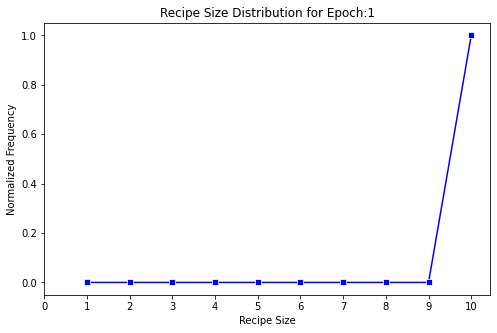

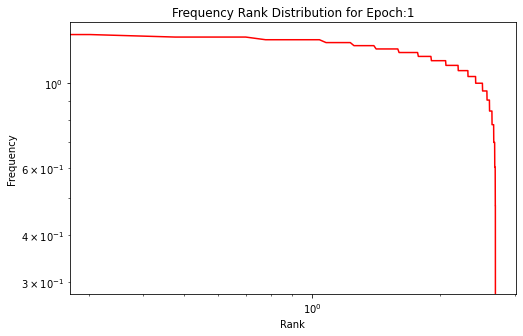










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 2
(Initial)Kitchen Basket Size:	 550
----------------------------------------------------------------------------------------------------
Epoch:	 2
Kitchen Basket Size:	 605
Number of Recipes in PrimordialCuisine:	 605
----------------------------------------------------------------------------------------------------


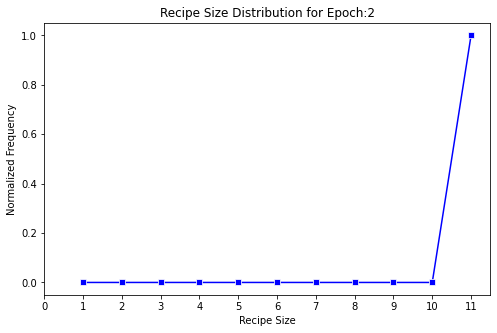

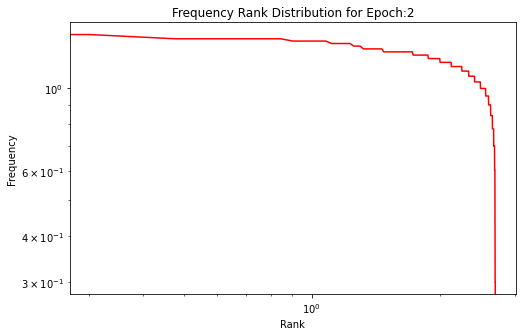










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 3
(Initial)Kitchen Basket Size:	 605
----------------------------------------------------------------------------------------------------
Epoch:	 3
Kitchen Basket Size:	 665
Number of Recipes in PrimordialCuisine:	 665
----------------------------------------------------------------------------------------------------


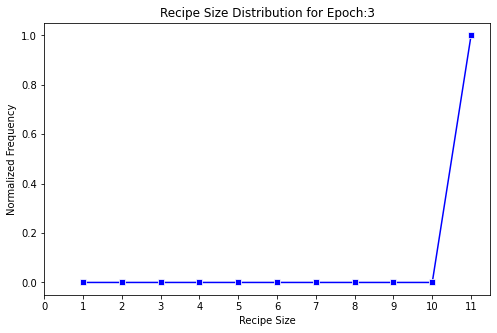

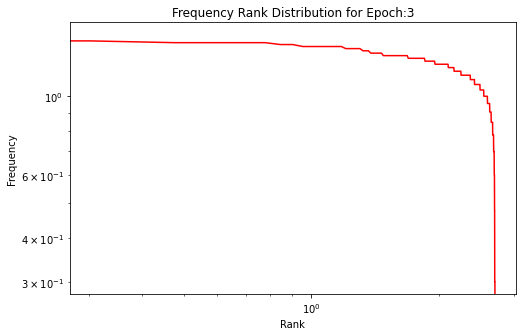










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 4
(Initial)Kitchen Basket Size:	 665
----------------------------------------------------------------------------------------------------
Epoch:	 4
Kitchen Basket Size:	 731
Number of Recipes in PrimordialCuisine:	 731
----------------------------------------------------------------------------------------------------


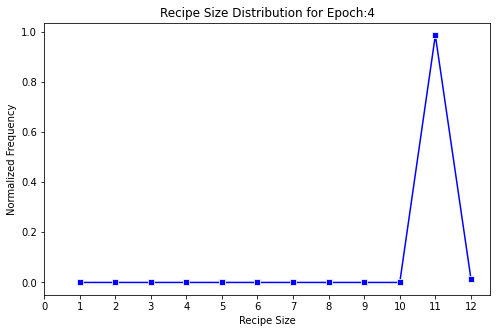

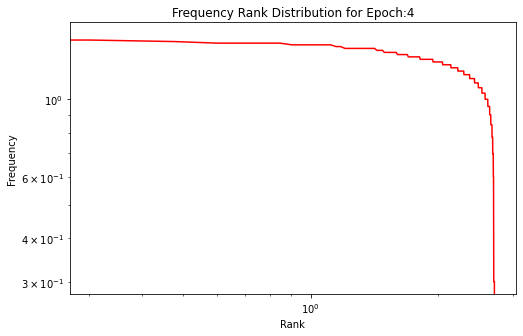










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 5
(Initial)Kitchen Basket Size:	 731
----------------------------------------------------------------------------------------------------
Epoch:	 5
Kitchen Basket Size:	 804
Number of Recipes in PrimordialCuisine:	 804
----------------------------------------------------------------------------------------------------


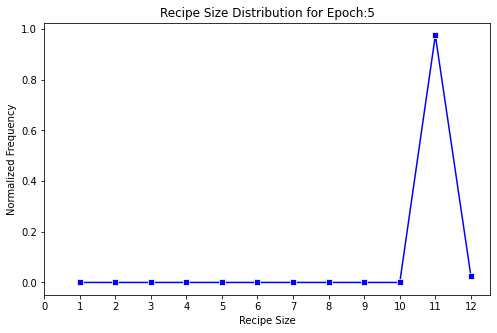

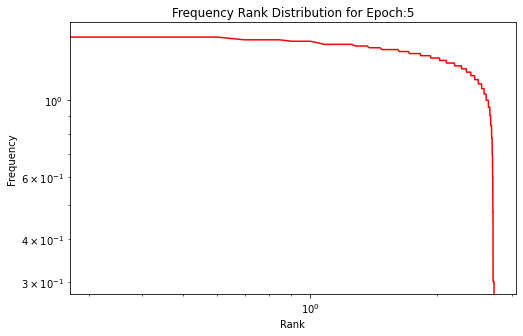










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 6
(Initial)Kitchen Basket Size:	 804
----------------------------------------------------------------------------------------------------
Epoch:	 6
Kitchen Basket Size:	 884
Number of Recipes in PrimordialCuisine:	 884
----------------------------------------------------------------------------------------------------


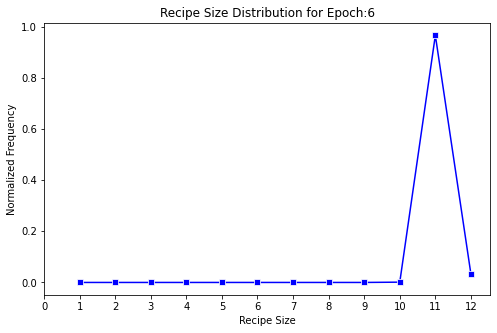

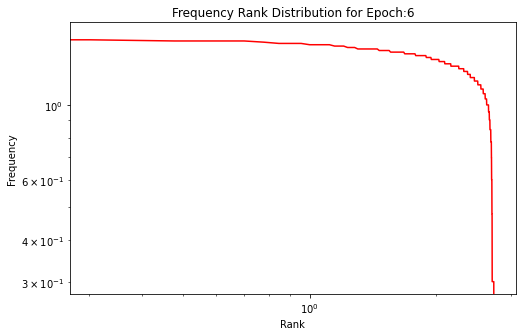










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 7
(Initial)Kitchen Basket Size:	 884
----------------------------------------------------------------------------------------------------
Epoch:	 7
Kitchen Basket Size:	 972
Number of Recipes in PrimordialCuisine:	 972
----------------------------------------------------------------------------------------------------


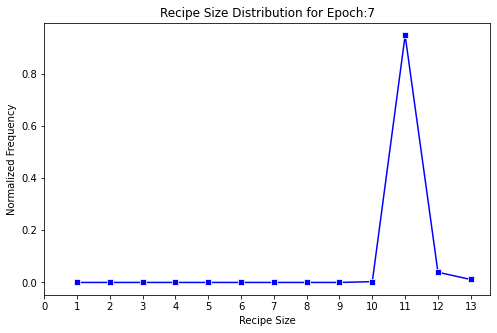

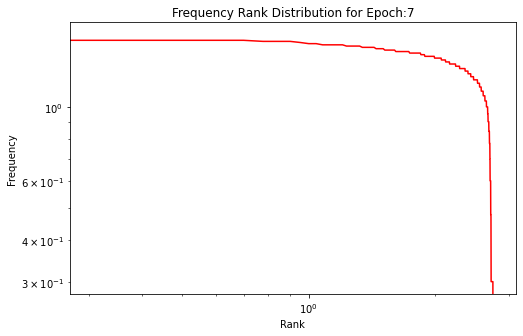










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 8
(Initial)Kitchen Basket Size:	 972
----------------------------------------------------------------------------------------------------
Epoch:	 8
Kitchen Basket Size:	 1069
Number of Recipes in PrimordialCuisine:	 1069
----------------------------------------------------------------------------------------------------


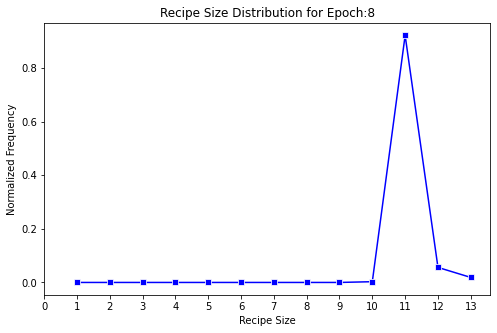

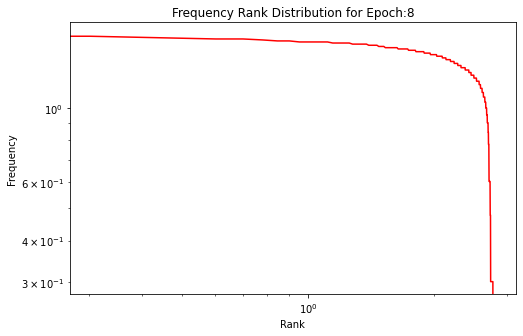










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 9
(Initial)Kitchen Basket Size:	 1069
----------------------------------------------------------------------------------------------------
Epoch:	 9
Kitchen Basket Size:	 1176
Number of Recipes in PrimordialCuisine:	 1176
----------------------------------------------------------------------------------------------------


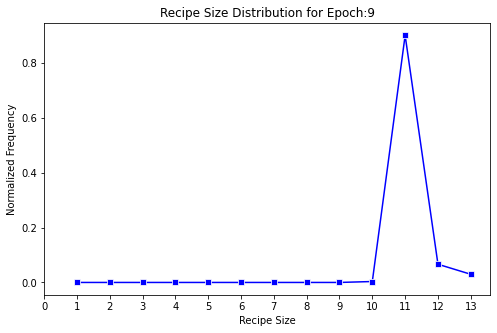

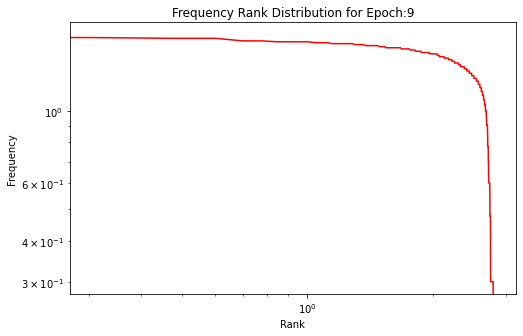










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 10
(Initial)Kitchen Basket Size:	 1176
----------------------------------------------------------------------------------------------------
Epoch:	 10
Kitchen Basket Size:	 1294
Number of Recipes in PrimordialCuisine:	 1294
----------------------------------------------------------------------------------------------------


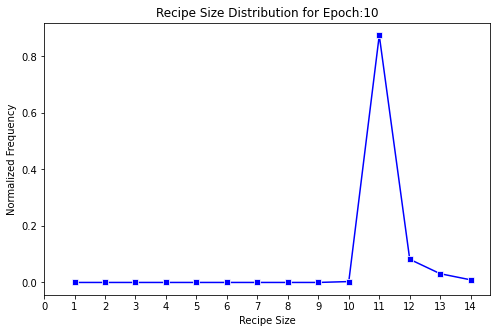

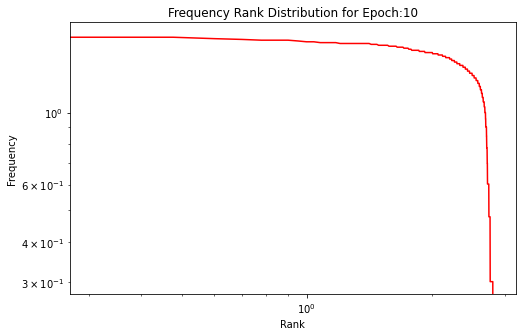

In [ ]:
primordial_cuisine = recipe # Just naming things
for epoch in range(1,number_epochs+1):
    print("----------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------")
    print("(Initial)Epoch:\t",epoch)
    print("(Initial)Kitchen Basket Size:\t",kitchen_basket_size)
    # Epoch 1 to NumberEpochs
    number_recipes = len(primordial_cuisine)
    number_recipes_per_epoch = round(number_recipes/number_epochs)
    # Add ingredients to kitchen basket such that ratio is maintained
    desired_kitchen_basket_size = round((number_recipes_per_epoch+number_recipes)/ratio)
    while(kitchen_basket_size<desired_kitchen_basket_size):
        # Add Ingredients to Kitchen Basket from Nature Basket
        random_ingredient = randrange(len(nature_basket))
        random_ingredient = list(nature_basket)[random_ingredient]
        nature_basket = nature_basket - set(random_ingredient) #Remove random ingredient from Nature Basket
        random_ingredient = ingredients_df[ingredients_df['Ingredient']==random_ingredient]
        kitchen_basket = kitchen_basket.append(random_ingredient, ignore_index = False)
        kitchen_basket_size += 1
    # Now add the recipes
    i=0
    while i < number_recipes_per_epoch:
        try:
            new_recipe = mutate()
            if type(new_recipe)==type(pd.DataFrame(kitchen_basket)):
                flag;
                # if some recipe generated
                new_rec_indices = list(new_recipe.index)
                new_rec_indices.sort()
                new_rec_str = ''.join([str(x) for x in new_rec_indices])
                for recipe_data in recipe:
                     indices = list(recipe_data.index)
                     indices.sort()
                     rec_data_str = ''.join([str(x) for x in indices])
                     if(new_rec_str==rec_data_str):
                         flag = False
                flag = True
                if flag == True:
                    # if recipe generated is unique, add it to cousine
                    primordial_cuisine.append(new_recipe)
                    i+=1
                else:
                    print("NOT UNIQUE")
            else:
                pass
                # print("State is False")

        except:
            pass
    #Print Stats
    print("----------------------------------------------------------------------------------------------------")
    print("Epoch:\t",epoch)
    print("Kitchen Basket Size:\t",kitchen_basket_size)
    print("Number of Recipes in PrimordialCuisine:\t",len(primordial_cuisine))
    print("----------------------------------------------------------------------------------------------------")
    plot_recipe_size_distribution(epoch)
#     plot_frequency_rank_distribution(epoch)
    plot_frequency_rank_distribution_scaled(epoch)
    print("\n\n\n\n\n\n\n\n")
    #Plot the graphs

In [ ]:
from pandas import *
data = read_csv("Ingrident_new2.csv")
data

,id,Ingrident
0,1,large baking potatoes
1,1,olive oil
2,1,kosher salt and freshly ground black pepper to...
3,1,garlic powder
4,1,dried parsley
...,...,...
154078,16868,minced fresh parsley
154079,16868,light olive oil
154080,16868,salt and ground black pepper to taste
154081,16868,cans shoepeg corn


**ques 5**

In [ ]:
from pandas import *
ingredients = []
data = read_csv("frequ.csv")
print(data)
for ingredient_list in data.Ingrident:
    ingredients.append(ingredient_list)

                                Ingrident  count
0                      cans chunk chicken      1
1                  ¾ cup hot pepper sauce      1
2                   packages cream cheese      9
3                          ranch dressing      2
4          ½ cups shredded Cheddar cheese      4
...                                   ...    ...
1410                         quarts water      1
1411                           cool water      1
1412                fat-free Greek yogurt      1
1413  ¼ cup garlic and herb cheese spread      1
1414           everything bagel seasoning      1

[1415 rows x 2 columns]


In [ ]:
import pandas as pd
from random import random
from random import sample
from random import randrange
ingredients_list = []
for ing in ingredients:
    ingredients_list.append([ing])
ingredients_df = pd.DataFrame(ingredients_list)
ingredients_df.columns =['Ingredient']
ingredients_df

,Ingredient
0,cans chunk chicken
1,¾ cup hot pepper sauce
2,packages cream cheese
3,ranch dressing
4,½ cups shredded Cheddar cheese
...,...
1410,quarts water
1411,cool water
1412,fat-free Greek yogurt
1413,¼ cup garlic and herb cheese spread


In [ ]:
nature_basket = ingredients # Initialize Nature Basket with list of all ingredients
kitchen_basket = [] # Will initially store 50 random ingredients
recipes = [] # Will store a list of recipes (initially 500) with size i.e., number of ingredients in each as 10
recipe_size = 10   #Recipe Size
number_epochs = 10 # Number of Epochs

In [ ]:
# Initialize Kitchen Basket
initial_number_ingredients = 50
#Generate and store list of indices of ingredients to be taken initially in kitchen basket
indices_kitchen_basket_initial = sample(list(range(len(ingredients))),initial_number_ingredients)
kitchen_basket = ingredients_df.iloc[indices_kitchen_basket_initial]
# remove from nature basket, those ingredients that are taken into kitchen basket
nature_basket = set(nature_basket) - set(kitchen_basket['Ingredient'])
print("Initial Kitchen Basket:")
kitchen_basket

Initial Kitchen Basket:


,Ingredient
1005,apricot jam (if using jam
1156,package shredded mozzarella cheese
823,shallots
1284,package frozen shredded hash browns
111,vegetable oil
1070,½ cup sugar
1076,pecans
527,ground beef
1173,grated Parmesan-style vegan cheese
418,unsalted butter


In [ ]:
#Initialize Recipes
'''
Generate a random set of 10 indices from kitchen basket ingredients,
if that set is not exisiting in the set of recipes,
add that set to set of recipes, else regenerate the set of ingredients,
repeat the process untill have sufficient number of recipes
'''
count_recipes_kb = 0 # The number of recipes generated

def check_recipe_unique(new_recipe,set_recipes):
    '''
    Takes two arguments:
        1) The new recipe i.e., list of indices of ingredients
        2) The set of such recipes that are already existing
    Returns whether argument 1 is unique, i.e., not a member of argument 2 (True/False)
    '''
    new_rep = new_recipe.copy()
    new_rep.sort()
    new_rep = ''.join([str(x) for x in new_rep]) #Convert into a string
    for exist_rep in set_recipes:
        exist_recipe = exist_rep.copy()
        exist_recipe.sort()
        exist_recipe = ''.join([str(x) for x in exist_recipe]) #Convert into a string
        if exist_recipe == new_rep:
            print("Duplicate New Recipe Generated, Retry!")
            return False
    return True #If no duplicates found

recipes_indices = []
while(count_recipes_kb<500):
    recipe_indices = sample(list(kitchen_basket.index),recipe_size)
    if check_recipe_unique(recipe_indices,recipes_indices):
        # if new recipe is unique, add it to solution
        recipes_indices.append(recipe_indices)
        count_recipes_kb+=1 # increase the count of added recipes

# Put Ingredient Names in recipes
recipe = []
for row in recipes_indices:
    recipe.append(kitchen_basket.loc[row])
recipe


[                                     Ingredient
 836                                blackberries
 1190                            ⅓ cup hot sauce
 1111                        ½ cup chicken broth
 1248                         herbed goat cheese
 744   ½ cup unsalted butter at room temperature
 112                                 ground pork
 537                  ¼ cup crumbled feta cheese
 31                                minced garlic
 1255                       canned chicken broth
 926       pastries for 9-inch single crust pies,
                               Ingredient
 943   x30-inch pieces of parchment paper
 1334           ¼ teaspoon dried marjoram
 1255                canned chicken broth
 1076                              pecans
 551              cubes  chicken bouillon
 527                          ground beef
 159      ¼ head iceberg lettuce - rinsed
 31                         minced garlic
 1248                  herbed goat cheese
 1256                 ½ cup half-and-hal

In [ ]:
kitchen_basket_size = len(kitchen_basket)
ratio = int(count_recipes_kb/kitchen_basket_size)

print("Ratio:\t",ratio)

Ratio:	 10


In [ ]:
print("Number of Epochs:\t",number_epochs)
print("Number of Ingredients Per Recipe:\t",recipe_size)
print("Number of Ingredients in each Recipe to be Mutated:\t",1)
print("Initial Number of Recipes:\t",500)
print("The Ratio between Sizes of, Pool of Ingredients and Pool of Recipes:\t1:10")

Number of Epochs:	 10
Number of Ingredients Per Recipe:	 10
Number of Ingredients in each Recipe to be Mutated:	 1
Initial Number of Recipes:	 500
The Ratio between Sizes of, Pool of Ingredients and Pool of Recipes:	1:10


In [ ]:
def add():

    # pick a random recipe
    number_recipes = len(recipe)
    random_picked_recipe = randrange(number_recipes)
    random_picked_recipe = recipe[random_picked_recipe]

    # pick a random ingredient from kitchen basket
    random_picked_ingredient_KB = sample(list(kitchen_basket.index),1)
    random_picked_ingredient_KB = kitchen_basket.loc[random_picked_ingredient_KB]
#     print("\nRandom Picked Recipe from Kitchen Basket:\n",random_picked_ingredient_KB)

    # add random picked ingredient from nature basket to recipe's ingredients
    random_picked_recipe = random_picked_recipe.append(random_picked_ingredient_KB, ignore_index = False)
    return random_picked_recipe

In [ ]:
def delete():
    # pick a random recipe
    number_recipes = len(recipe)
    random_picked_recipe = randrange(number_recipes)
    random_picked_recipe = recipe[random_picked_recipe]
    # pick a random ingredient from random picked recipe
    random_picked_ingredient = sample(list(random_picked_recipe.index),1)
    random_picked_ingredient = random_picked_recipe.loc[random_picked_ingredient]
    random_picked_recipe = random_picked_recipe.drop(random_picked_ingredient.index,axis=0)
    return random_picked_recipe

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 1
(Initial)Kitchen Basket Size:	 50
----------------------------------------------------------------------------------------------------
Epoch:	 1
Kitchen Basket Size:	 55
Number of Recipes in PrimordialCuisine:	 550
----------------------------------------------------------------------------------------------------
Count of addition operations:	 15
Count of deletion operations:	 15
Count of mutation operations:	 15


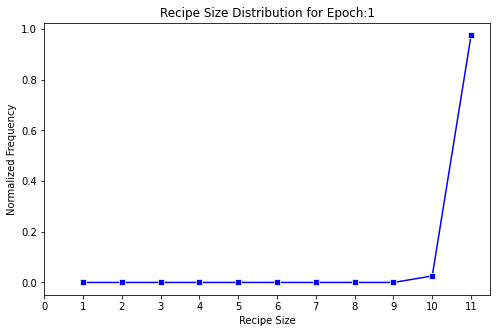

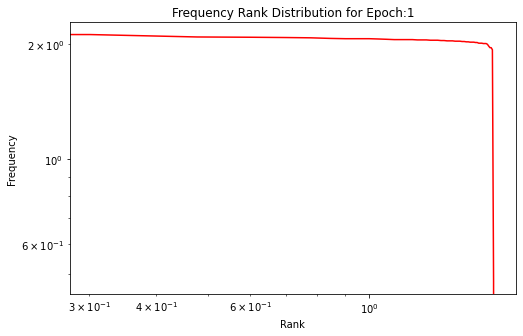










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 2
(Initial)Kitchen Basket Size:	 55
----------------------------------------------------------------------------------------------------
Epoch:	 2
Kitchen Basket Size:	 60
Number of Recipes in PrimordialCuisine:	 605
----------------------------------------------------------------------------------------------------
Count of addition operations:	 25
Count of deletion operations:	 15
Count of mutation operations:	 15


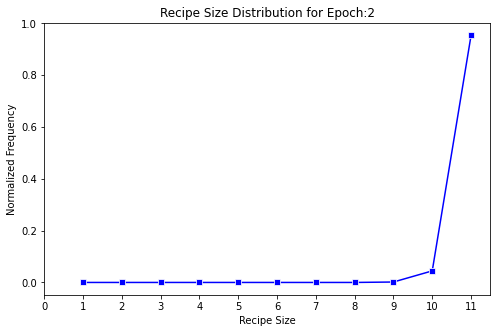

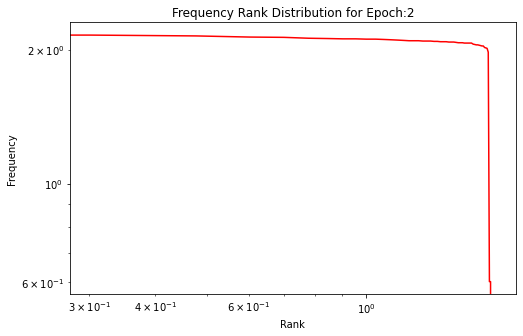










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 3
(Initial)Kitchen Basket Size:	 60
----------------------------------------------------------------------------------------------------
Epoch:	 3
Kitchen Basket Size:	 66
Number of Recipes in PrimordialCuisine:	 665
----------------------------------------------------------------------------------------------------
Count of addition operations:	 22
Count of deletion operations:	 23
Count of mutation operations:	 23


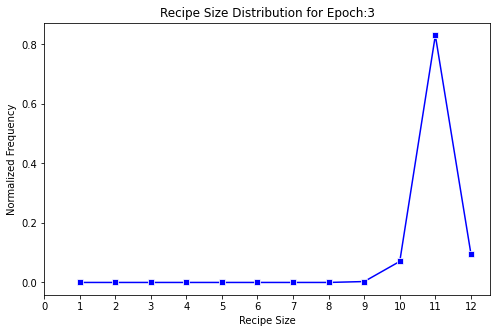

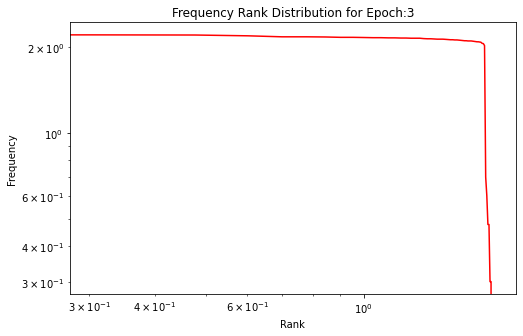










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 4
(Initial)Kitchen Basket Size:	 66
----------------------------------------------------------------------------------------------------
Epoch:	 4
Kitchen Basket Size:	 73
Number of Recipes in PrimordialCuisine:	 731
----------------------------------------------------------------------------------------------------
Count of addition operations:	 18
Count of deletion operations:	 22
Count of mutation operations:	 22


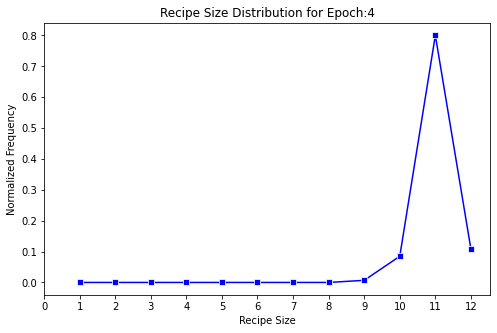

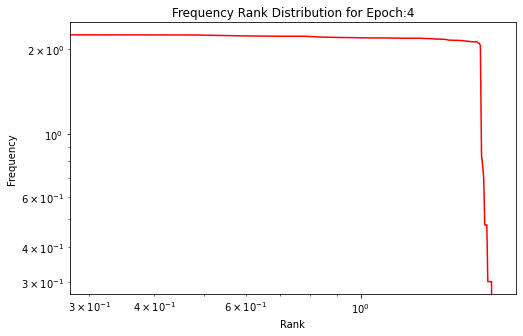










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 5
(Initial)Kitchen Basket Size:	 73
----------------------------------------------------------------------------------------------------
Epoch:	 5
Kitchen Basket Size:	 80
Number of Recipes in PrimordialCuisine:	 804
----------------------------------------------------------------------------------------------------
Count of addition operations:	 23
Count of deletion operations:	 21
Count of mutation operations:	 21


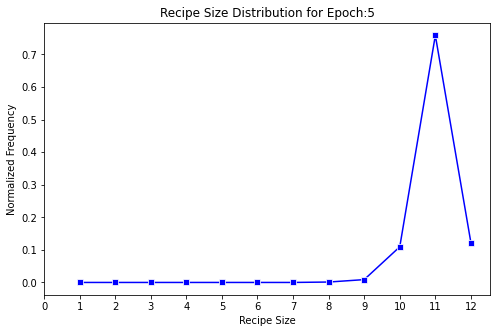

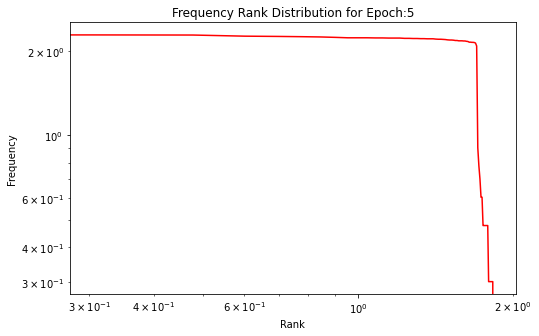










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 6
(Initial)Kitchen Basket Size:	 80
----------------------------------------------------------------------------------------------------
Epoch:	 6
Kitchen Basket Size:	 88
Number of Recipes in PrimordialCuisine:	 884
----------------------------------------------------------------------------------------------------
Count of addition operations:	 21
Count of deletion operations:	 31
Count of mutation operations:	 31


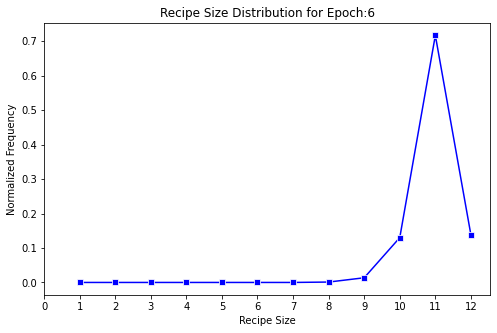

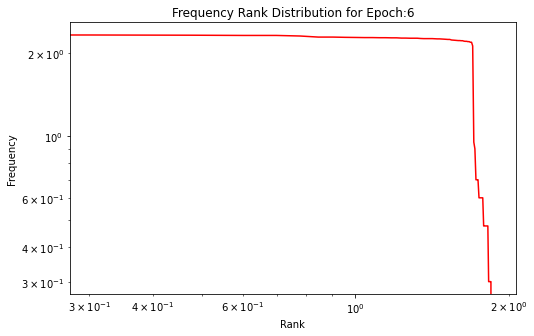










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 7
(Initial)Kitchen Basket Size:	 88
----------------------------------------------------------------------------------------------------
Epoch:	 7
Kitchen Basket Size:	 97
Number of Recipes in PrimordialCuisine:	 972
----------------------------------------------------------------------------------------------------
Count of addition operations:	 25
Count of deletion operations:	 35
Count of mutation operations:	 35


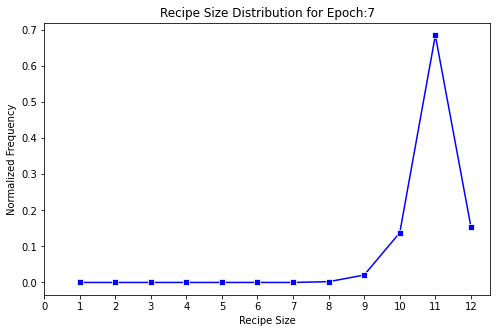

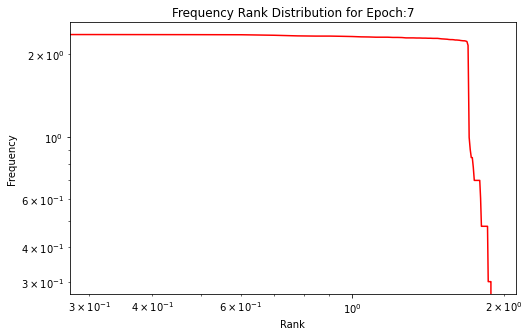










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 8
(Initial)Kitchen Basket Size:	 97
----------------------------------------------------------------------------------------------------
Epoch:	 8
Kitchen Basket Size:	 107
Number of Recipes in PrimordialCuisine:	 1069
----------------------------------------------------------------------------------------------------
Count of addition operations:	 32
Count of deletion operations:	 34
Count of mutation operations:	 34


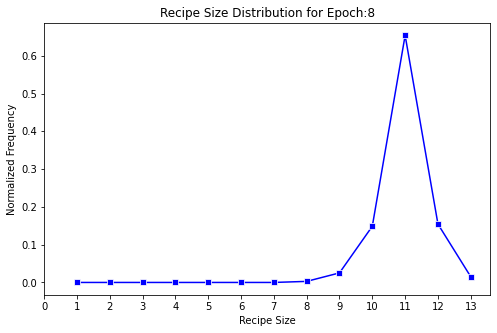

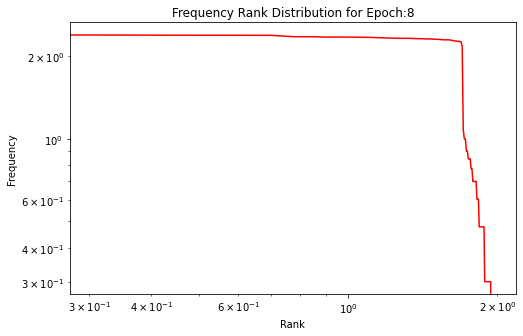










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 9
(Initial)Kitchen Basket Size:	 107
----------------------------------------------------------------------------------------------------
Epoch:	 9
Kitchen Basket Size:	 118
Number of Recipes in PrimordialCuisine:	 1176
----------------------------------------------------------------------------------------------------
Count of addition operations:	 34
Count of deletion operations:	 35
Count of mutation operations:	 35


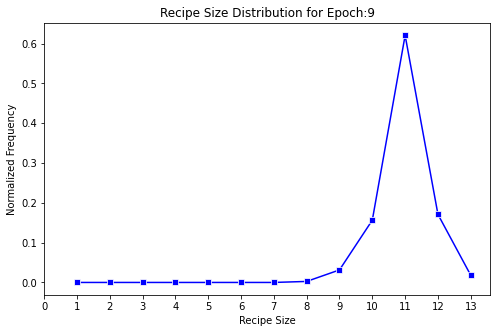

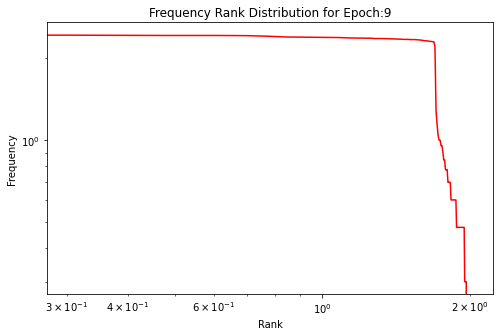










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 10
(Initial)Kitchen Basket Size:	 118
----------------------------------------------------------------------------------------------------
Epoch:	 10
Kitchen Basket Size:	 129
Number of Recipes in PrimordialCuisine:	 1294
----------------------------------------------------------------------------------------------------
Count of addition operations:	 41
Count of deletion operations:	 39
Count of mutation operations:	 39


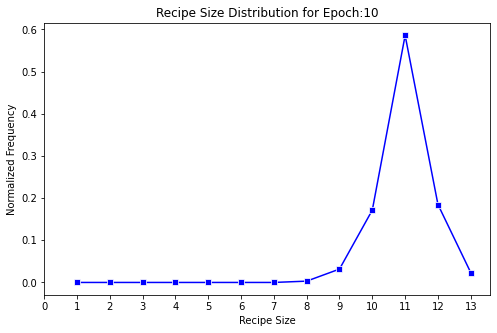

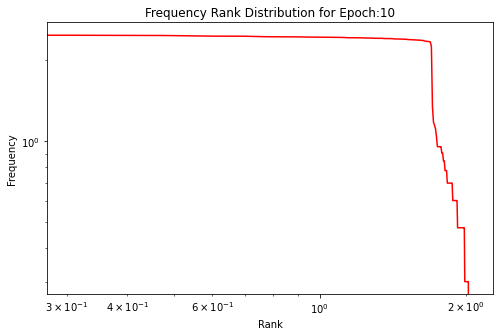

In [ ]:
primordial_cuisine = recipe # Just naming things
for epoch in range(1,number_epochs+1):
    print("----------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------")
    print("(Initial)Epoch:\t",epoch)
    print("(Initial)Kitchen Basket Size:\t",kitchen_basket_size)
    # Epoch 1 to NumberEpochs
    number_recipes = len(primordial_cuisine)
    number_recipes_per_epoch = round(number_recipes/number_epochs)
    # Add ingredients to kitchen basket such that ratio is maintained
    desired_kitchen_basket_size = round((number_recipes_per_epoch+number_recipes)/ratio)
    while(kitchen_basket_size<desired_kitchen_basket_size):
        # Add Ingredients to Kitchen Basket from Nature Basket
        random_ingredient = randrange(len(nature_basket))
        random_ingredient = list(nature_basket)[random_ingredient]
        nature_basket = nature_basket - set(random_ingredient) #Remove random ingredient from Nature Basket
        random_ingredient = ingredients_df[ingredients_df['Ingredient']==random_ingredient]
        kitchen_basket = kitchen_basket.append(random_ingredient, ignore_index = False)
        kitchen_basket_size += 1
    # Now add the recipes
    i=0
    operations_performed = []
    while i < number_recipes_per_epoch:
        random_operation = randrange(3)   # Generate a random number that decides wheter to add(2), delete(1) or mutate(0)
        operations_performed.append(random_operation)
        try:
            if random_operation==0:
                new_recipe = mutate()
            elif random_operation==1:
                new_recipe = delete()
            elif random_operation==2:
                new_recipe = add()
            if type(new_recipe)==type(pd.DataFrame(kitchen_basket)):
                # if some recipe generated
                new_rec_indices = list(new_recipe.index)
                new_rec_indices.sort()
                new_rec_str = ''.join([str(x) for x in new_rec_indices])
                for recipe_data in recipe:
                     indices = list(recipe_data.index)
                     indices.sort()
                     rec_data_str = ''.join([str(x) for x in indices])
                     if(new_rec_str==rec_data_str):
                         flag = False
                flag = True
                if flag == True:
                    # if recipe generated is unique, add it to cousine
                    primordial_cuisine.append(new_recipe)
                    i+=1
                else:
                    print("NOT UNIQUE")
            else:
                pass
                # print("State is False")

        except:
            pass
    #Print Stats
    print("----------------------------------------------------------------------------------------------------")
    print("Epoch:\t",epoch)
    print("Kitchen Basket Size:\t",kitchen_basket_size)
    print("Number of Recipes in PrimordialCuisine:\t",len(primordial_cuisine))
    print("----------------------------------------------------------------------------------------------------")
    counts_ops = dict(Counter(operations_performed))
    print("Count of addition operations:\t",counts_ops[2])
    print("Count of deletion operations:\t",counts_ops[1])
    print("Count of mutation operations:\t",counts_ops[1])
    plot_recipe_size_distribution(epoch)
#     plot_frequency_rank_distribution(epoch)
    plot_frequency_rank_distribution_scaled(epoch)
    print("\n\n\n\n\n\n\n\n")
    #Plot the graphs

QUES-**6** **bold text**

In [ ]:
from pandas import *
ingredients = []
data = read_csv("frequ.csv")
print(data)
for ingredient_list in data.Ingrident:
    ingredients.append(ingredient_list)

                          Ingrident  count
0                cans chunk chicken      1
1            ¾ cup hot pepper sauce      1
2             packages cream cheese      1
3                    ranch dressing      1
4    ½ cups shredded Cheddar cheese      1
..                              ...    ...
223                   cooking spray      1
224              frozen puff pastry      1
225           ½ cup cranberry sauce      1
226    ½ cup finely chopped walnuts      1
227               sea salt to taste      1

[228 rows x 2 columns]


In [ ]:
ingredients_fitness = []
for ing in ingredients:
    no = data.loc[data['Ingrident'] == ing, 'count'].values[0]
    ingredients_fitness.append([ing,random() + no])
ingredients_fitness_df = pd.DataFrame(ingredients_fitness,columns=('Ingredient','Fitness'))
ingredients_fitness_df

,Ingredient,Fitness
0,cans chunk chicken,1.568325
1,¾ cup hot pepper sauce,1.447782
2,packages cream cheese,1.925830
3,ranch dressing,1.635948
4,½ cups shredded Cheddar cheese,1.500025
...,...,...
223,cooking spray,1.426345
224,frozen puff pastry,1.611775
225,½ cup cranberry sauce,1.724327
226,½ cup finely chopped walnuts,1.525166


In [ ]:
nature_basket = ingredients # Initialize Nature Basket with list of all ingredients
kitchen_basket = [] # Will initially store 50 random ingredients
recipes = [] # Will store a list of recipes (initially 500) with size i.e., number of ingredients in each as 10
recipe_size = 10   #Recipe Size
number_epochs = 10 # Number of Epochs

In [ ]:
initial_number_ingredients = 50
#Generate and store list of indices of ingredients to be taken initially in kitchen basket
indices_kitchen_basket_initial = sample(list(range(len(ingredients))),initial_number_ingredients)
kitchen_basket = ingredients_fitness_df.iloc[indices_kitchen_basket_initial]
# remove from nature basket, those ingredients that are taken into kitchen basket
nature_basket = nature_basket - set(kitchen_basket['Ingredient'])
print("Initial Kitchen Basket:")
kitchen_basket

Initial Kitchen Basket:


,Ingredient,Fitness
212,¼ cup soy sauce,1.620110
140,egg roll wrappers,1.943749
39,slices bacon,1.700679
124,cans tuna,1.319568
10,½ tablespoons poppy seeds,1.686218
8,½ tablespoons Dijon mustard,1.817727
61,¼ teaspoon garlic powder,1.537173
170,buttermilk,1.165704
118,lumpia wrappers,1.507446
65,ground cinnamon,2.935299


In [ ]:
#Initialize Recipes
'''
Generate a random set of 10 indices from kitchen basket ingredients,
if that set is not exisiting in the set of recipes,
add that set to set of recipes, else regenerate the set of ingredients,
repeat the process untill have sufficient number of recipes
'''
count_recipes_kb = 0 # The number of recipes generated

def check_recipe_unique(new_recipe,set_recipes):
    '''
    Takes two arguments:
        1) The new recipe i.e., list of indices of ingredients
        2) The set of such recipes that are already existing
    Returns whether argument 1 is unique, i.e., not a member of argument 2 (True/False)
    '''
    new_rep = new_recipe.copy()
    new_rep.sort()
    new_rep = ''.join([str(x) for x in new_rep]) #Convert into a string
    for exist_rep in set_recipes:
        exist_recipe = exist_rep.copy()
        exist_recipe.sort()
        exist_recipe = ''.join([str(x) for x in exist_recipe]) #Convert into a string
        if exist_recipe == new_rep:
            print("Duplicate New Recipe Generated, Retry!")
            return False
    return True #If no duplicates found

recipes_indices = []
while(count_recipes_kb<500):
    recipe_indices = sample(list(kitchen_basket.index),recipe_size)
    if check_recipe_unique(recipe_indices,recipes_indices):
        # if new recipe is unique, add it to solution
        recipes_indices.append(recipe_indices)
        count_recipes_kb+=1 # increase the count of added recipes

# Put Ingredient Names in recipes
recipe = []
for row in recipes_indices:
    recipe.append(kitchen_basket.loc[row])
recipe

[                               Ingredient   Fitness
 215                            sushi nori  1.961222
 31                          minced garlic  1.898153
 57    shredded extra-sharp Cheddar cheese  2.824249
 45                          rice wrappers  1.432824
 97                              soy sauce  2.953439
 39                           slices bacon  1.700679
 6           box chicken-flavored crackers  1.973057
 178            small head iceberg lettuce  1.000760
 188                ½ bunch fresh cilantro  1.056639
 105  ½ cups Italian seasoned bread crumbs  1.264801,
                               Ingredient   Fitness
 124                            cans tuna  1.319568
 51                      fresh lime juice  2.598893
 187                        pickling salt  1.931080
 57   shredded extra-sharp Cheddar cheese  2.824249
 215                           sushi nori  1.961222
 6          box chicken-flavored crackers  1.973057
 170                           buttermilk  1.165704


In [ ]:
kitchen_basket_size = len(kitchen_basket)
ratio = int(count_recipes_kb/kitchen_basket_size)

print("Ratio:\t",ratio)

Ratio:	 10


In [ ]:
def mutate1():
    '''
        Pick a random recipe RR in Primordial Cuisine
        Pick a random ingredient from RR, RI
        Pick a random ingredient form KB, RK
        Compare fitness of RI and RK, if RK>RI, replace RI by RK and insert as new recipe
            else, return None.
    '''
    # pick a random recipe
    number_recipes = len(recipe)
    random_picked_recipe = randrange(number_recipes)
    random_picked_recipe = recipe[random_picked_recipe]
    # pick a random ingredient from random picked recipe
    random_picked_ingredient = sample(list(random_picked_recipe.index),1)
    random_picked_ingredient = random_picked_recipe.loc[random_picked_ingredient]
#     print("Random Picked Ingredient from Primordial Cuisine:\n",random_picked_ingredient)

    # pick a random ingredient from kitchen basket
    random_picked_ingredient_KB = sample(list(kitchen_basket.index),1)
    random_picked_ingredient_KB = kitchen_basket.loc[random_picked_ingredient_KB]
#     print("\nRandom Picked Ingredient from Kitchen Basket:\n",random_picked_ingredient_KB)
    #comapre fitness
    if float(random_picked_ingredient_KB['Fitness']) > float(random_picked_ingredient['Fitness']):
        # replace ingredient
#         print("Replacing")
        random_picked_recipe = random_picked_recipe.drop(random_picked_ingredient.index,axis=0)
        random_picked_recipe = random_picked_recipe.append(random_picked_ingredient_KB, ignore_index = False)
        return random_picked_recipe
    else:
        # cannot replace
#         print("Not Replacing")
        return None

In [ ]:
print("Number of Epochs:\t",number_epochs)
print("Number of Ingredients Per Recipe:\t",recipe_size)
print("Number of Ingredients in each Recipe to be Mutated:\t",1)
print("Initial Number of Recipes:\t",500)
print("The Ratio between Sizes of, Pool of Ingredients and Pool of Recipes:\t1:10")

Number of Epochs:	 10
Number of Ingredients Per Recipe:	 10
Number of Ingredients in each Recipe to be Mutated:	 1
Initial Number of Recipes:	 500
The Ratio between Sizes of, Pool of Ingredients and Pool of Recipes:	1:10


In [ ]:
def add():

    # pick a random recipe
    number_recipes = len(recipe)
    random_picked_recipe = randrange(number_recipes)
    random_picked_recipe = recipe[random_picked_recipe]

    # pick a random ingredient from kitchen basket
    random_picked_ingredient_KB = sample(list(kitchen_basket.index),1)
    random_picked_ingredient_KB = kitchen_basket.loc[random_picked_ingredient_KB]
#     print("\nRandom Picked Recipe from Kitchen Basket:\n",random_picked_ingredient_KB)

    # add random picked ingredient from nature basket to recipe's ingredients
    random_picked_recipe = random_picked_recipe.append(random_picked_ingredient_KB, ignore_index = False)
    return random_picked_recipe

In [ ]:
def delete():
    # pick a random recipe
    number_recipes = len(recipe)
    random_picked_recipe = randrange(number_recipes)
    random_picked_recipe = recipe[random_picked_recipe]
    # pick a random ingredient from random picked recipe
    random_picked_ingredient = sample(list(random_picked_recipe.index),1)
    random_picked_ingredient = random_picked_recipe.loc[random_picked_ingredient]
    random_picked_recipe = random_picked_recipe.drop(random_picked_ingredient.index,axis=0)
    return random_picked_recipe

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 1
(Initial)Kitchen Basket Size:	 129
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
----------------------------------------------------------------------------------------------------
Epoch:	 1
Kitchen Basket Size:	 142
Number of Recipes in PrimordialCuisine:	 1423
----------------------------------------------------------------------------------------------------
Count of addition operations:	 53
Count of deletion operations:	 67
Count of mutation operations:	 67


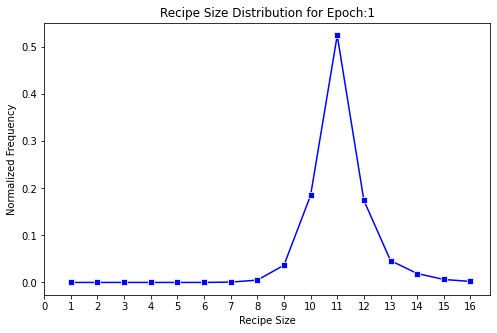

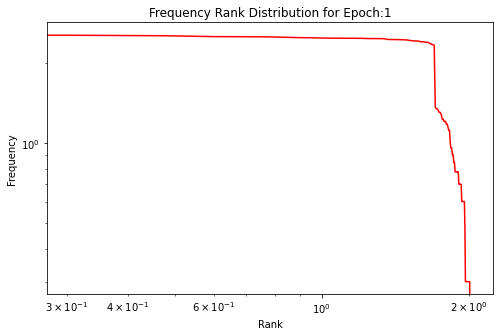










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 2
(Initial)Kitchen Basket Size:	 142
NOT UNIQUE
NOT UNIQUE
----------------------------------------------------------------------------------------------------
Epoch:	 2
Kitchen Basket Size:	 156
Number of Recipes in PrimordialCuisine:	 1565
----------------------------------------------------------------------------------------------------
Count of addition operations:	 66
Count of deletion operations:	 62
Count of mutation operations:	 62


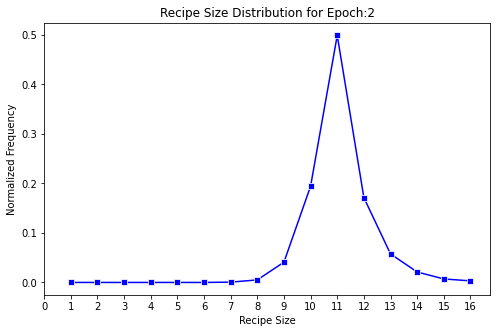

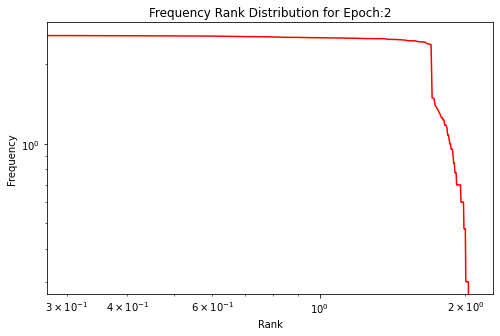










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 3
(Initial)Kitchen Basket Size:	 156
NOT UNIQUE
----------------------------------------------------------------------------------------------------
Epoch:	 3
Kitchen Basket Size:	 172
Number of Recipes in PrimordialCuisine:	 1721
----------------------------------------------------------------------------------------------------
Count of addition operations:	 74
Count of deletion operations:	 67
Count of mutation operations:	 67


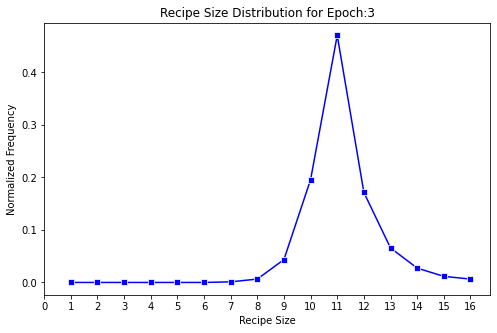

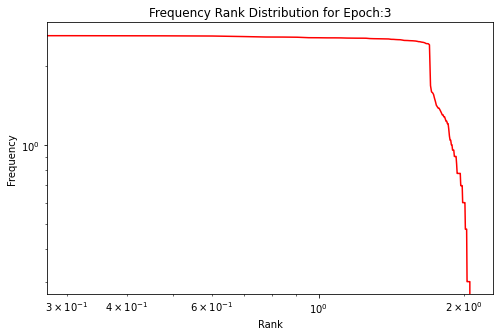










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 4
(Initial)Kitchen Basket Size:	 172
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
----------------------------------------------------------------------------------------------------
Epoch:	 4
Kitchen Basket Size:	 189
Number of Recipes in PrimordialCuisine:	 1893
----------------------------------------------------------------------------------------------------
Count of addition operations:	 69
Count of deletion operations:	 91
Count of mutation operations:	 91


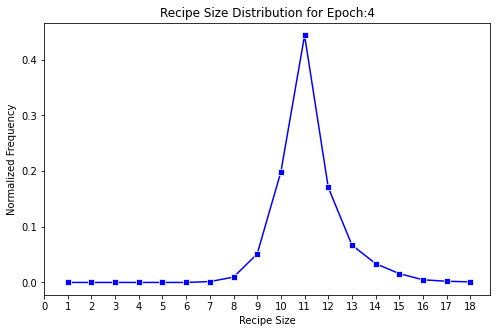

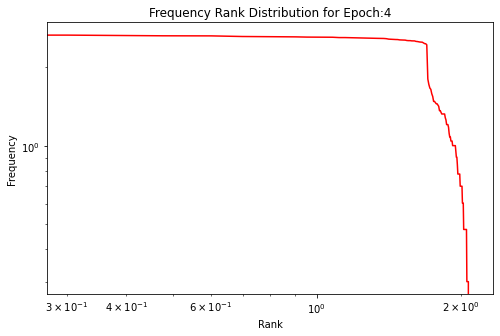










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 5
(Initial)Kitchen Basket Size:	 189
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
----------------------------------------------------------------------------------------------------
Epoch:	 5
Kitchen Basket Size:	 208
Number of Recipes in PrimordialCuisine:	 2082
----------------------------------------------------------------------------------------------------
Count of addition operations:	 85
Count of deletion operations:	 99
Count of mutation operations:	 99


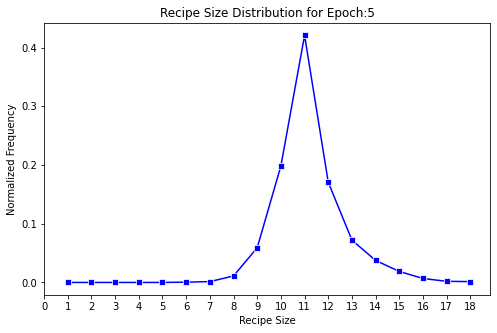

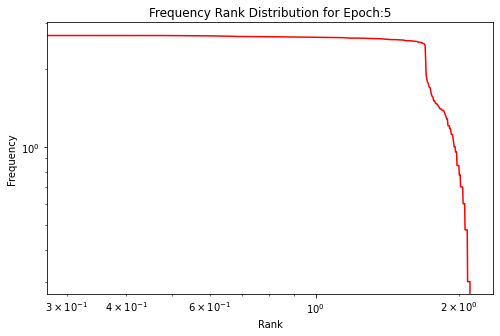










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 6
(Initial)Kitchen Basket Size:	 208
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
----------------------------------------------------------------------------------------------------
Epoch:	 6
Kitchen Basket Size:	 229
Number of Recipes in PrimordialCuisine:	 2290
----------------------------------------------------------------------------------------------------
Count of addition operations:	 104
Count of deletion operations:	 96
Count of mutation operations:	 96


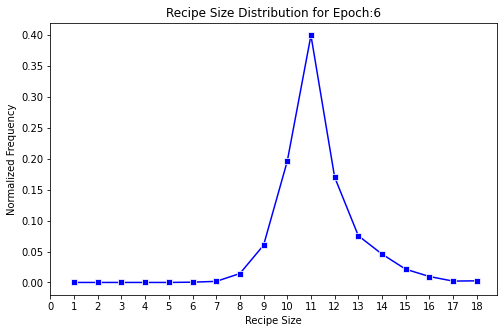

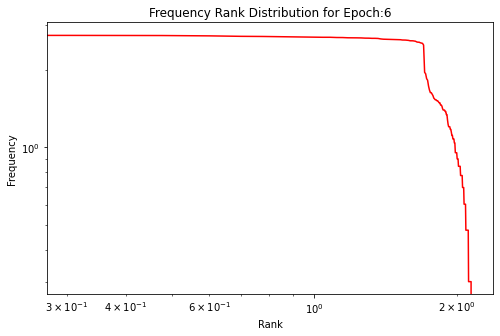










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 7
(Initial)Kitchen Basket Size:	 229
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
----------------------------------------------------------------------------------------------------
Epoch:	 7
Kitchen Basket Size:	 252
Number of Recipes in PrimordialCuisine:	 2519
----------------------------------------------------------------------------------------------------
Count of addition operations:	 110
Count of deletion operations:	 111
Count of mutation operations:	 111


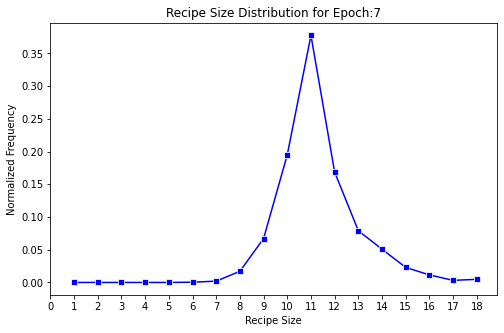

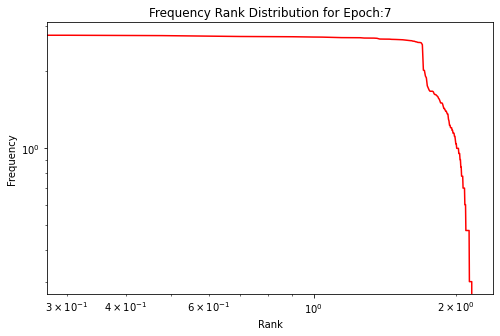










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 8
(Initial)Kitchen Basket Size:	 252
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
----------------------------------------------------------------------------------------------------
Epoch:	 8
Kitchen Basket Size:	 277
Number of Recipes in PrimordialCuisine:	 2771
----------------------------------------------------------------------------------------------------
Count of addition operations:	 119
Count of deletion operations:	 114
Count of mutation operations:	 114


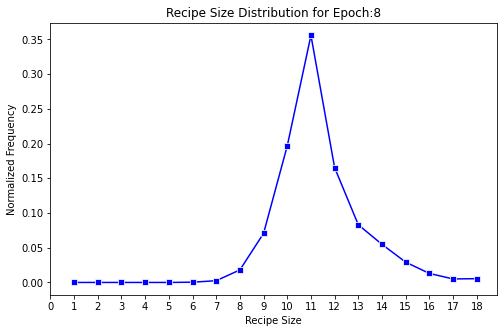

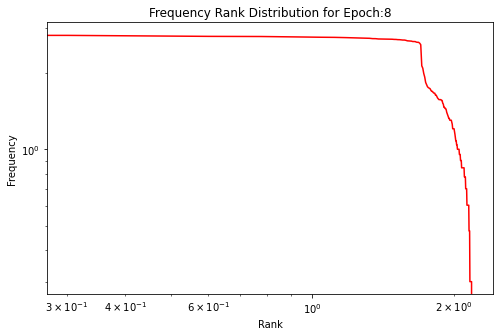










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 9
(Initial)Kitchen Basket Size:	 277
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
----------------------------------------------------------------------------------------------------
Epoch:	 9
Kitchen Basket Size:	 305
Number of Recipes in PrimordialCuisine:	 3048
----------------------------------------------------------------------------------------------------
Count of addition operations:	 147
Count of deletion operations:	 112
Count of mutation operations:	 112


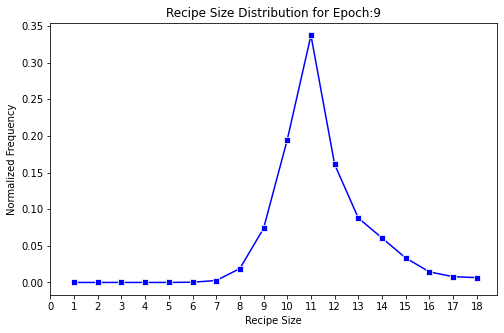

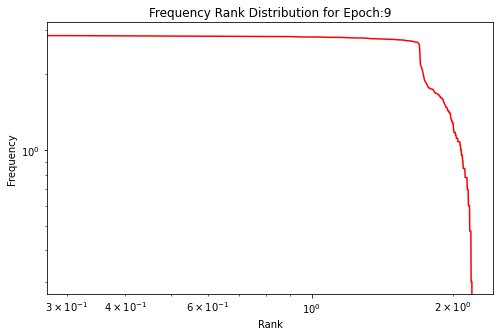










----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
(Initial)Epoch:	 10
(Initial)Kitchen Basket Size:	 305
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
NOT UNIQUE
----------------------------------------------------------------------------------------------------
Epoch:	 10
Kitchen Basket Size:	 335
Number of Recipes in PrimordialCuisine:	 3353
----------------------------------------------------------------------------------------------------
Count of addition operations:	 157
Count of deletion operations:	 141
Count of mutation operations:	 141


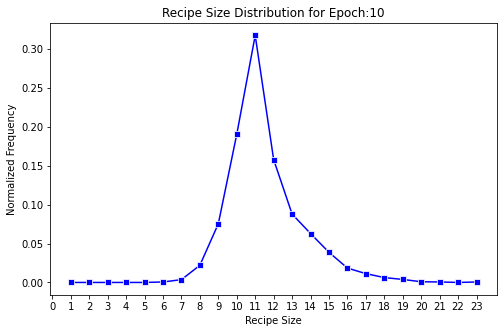

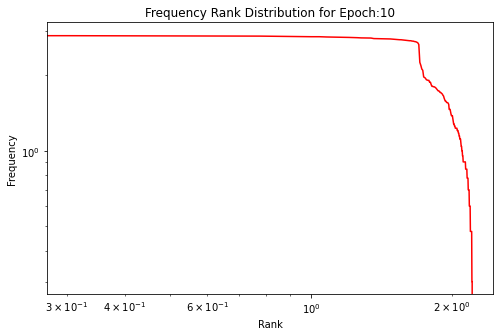

In [ ]:
primordial_cuisine = recipe # Just naming things
for epoch in range(1,number_epochs+1):
    print("----------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------")
    print("(Initial)Epoch:\t",epoch)
    print("(Initial)Kitchen Basket Size:\t",kitchen_basket_size)
    # Epoch 1 to NumberEpochs
    number_recipes = len(primordial_cuisine)
    number_recipes_per_epoch = round(number_recipes/number_epochs)
    # Add ingredients to kitchen basket such that ratio is maintained
    desired_kitchen_basket_size = round((number_recipes_per_epoch+number_recipes)/ratio)
    while(kitchen_basket_size<desired_kitchen_basket_size):
        # Add Ingredients to Kitchen Basket from Nature Basket
        random_ingredient = randrange(len(nature_basket))
        random_ingredient = list(nature_basket)[random_ingredient]
        nature_basket = nature_basket - set(random_ingredient) #Remove random ingredient from Nature Basket
        random_ingredient = ingredients_fitness_df[ingredients_fitness_df['Ingredient']==random_ingredient]
        kitchen_basket = kitchen_basket.append(random_ingredient, ignore_index = False)
        kitchen_basket_size += 1
    # Now add the recipes
    i=0
    operations_performed = []
    while i < number_recipes_per_epoch:
        random_operation = randrange(3)   # Generate a random number that decides wheter to add(2), delete(1) or mutate(0)
        operations_performed.append(random_operation)
        try:
            if random_operation==0:
                new_recipe = mutate1()
            elif random_operation==1:
                new_recipe = delete()
            elif random_operation==2:
                new_recipe = add()
            if type(new_recipe)==type(pd.DataFrame(kitchen_basket)):
                # if some recipe generated
                if check_unique_recipe(new_recipe,recipe):
                    # if recipe generated is unique, add it to cousine
                    primordial_cuisine.append(new_recipe)
                    i+=1
                else:
                    print("NOT UNIQUE")
            else:
                pass
                # print("State is False")

        except:
            pass
    #Print Stats
    print("----------------------------------------------------------------------------------------------------")
    print("Epoch:\t",epoch)
    print("Kitchen Basket Size:\t",kitchen_basket_size)
    print("Number of Recipes in PrimordialCuisine:\t",len(primordial_cuisine))
    print("----------------------------------------------------------------------------------------------------")
    counts_ops = dict(Counter(operations_performed))
    print("Count of addition operations:\t",counts_ops[2])
    print("Count of deletion operations:\t",counts_ops[1])
    print("Count of mutation operations:\t",counts_ops[1])
    plot_recipe_size_distribution(epoch)
#     plot_frequency_rank_distribution(epoch)
    plot_frequency_rank_distribution_scaled(epoch)
    print("\n\n\n\n\n\n\n\n")
    #Plot the graphs